# Alcove art in olive wood
$\newcommand{\K}{\mathbb{K}}$
<img src="media/alcoves-result.jpg" align="right" width="35%"/>

Sage Days 107<br>
Orsay, Wednesday 20th of February 2020

[Nicolas M. Thiéry](http://Nicolas.Thiery.name)<br>
LRI, Université Paris Saclay

<br>
View the (live) slides online:
<a href="https://nbviewer.jupyter.org/github/nthiery/shared-sage-notebooks/blob/master/2020-02-19-AlcoveArt.ipynb">
<img src="2020-02-19-AlcoveArt.ipynb.qrcode.png" width="25%"></a>

## Abstract

I made the above piece of art in 2015 as a gift for a friend working on crystals and root
systems. It represents an alcove walk in the root system of affine type $\tilde A_2$.

It is about 10 cm high and laser cut in a 3mm slice of wood.
The wood comes from an old olive tree in my grand parents' garden in
Provence that had died of frost in the harsh winter of 1955. 


In this presentation I briefly explain the math behind, describe the process to reproduce it, and propose a project to improve the process.

## The maths behind
### Root systems
A *root system* encodes a well-behaved arrangement of reflections:

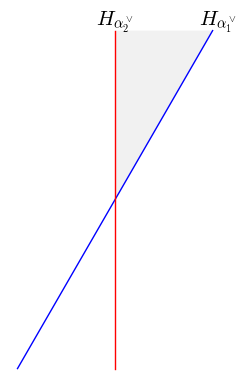

In [3]:
L = RootSystem(["G",2]).ambient_space()
L.plot(fundamental_weights=false, roots=false)

These reflections generate a group: the *Coxeter group*. Here it's a dihedral group.

Let's draw all the reflection hyperplanes for this group:

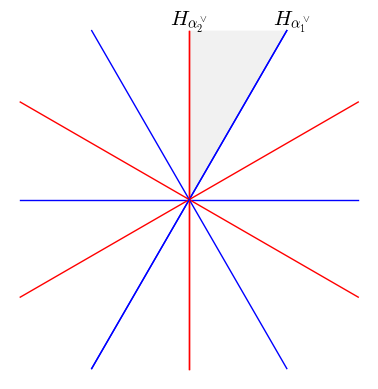

In [4]:
L.plot(alcoves=true, fundamental_weights=false, roots=false)

- The hyperplanes cut the space into alcoves
- The alcoves are in bijection with the elements of the group

### A 3D example: the symmetric group $S_4$ (type $A_4$)

In [2]:
L = RootSystem(["A",3]).ambient_space()
L.plot(fundamental_weights=false, alcoves=true)

Graphics3d Object

### Affine root systems
Now what happens with these three affine reflections?

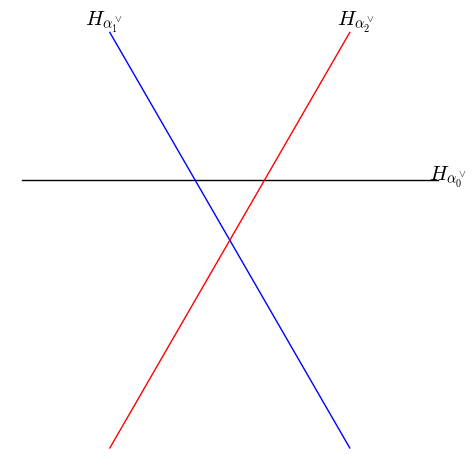

In [3]:
L = RootSystem(["A",2,1]).ambient_space()
L.plot(fundamental_weights=false, alcoves=false, fundamental_chamber=false, roots=false)

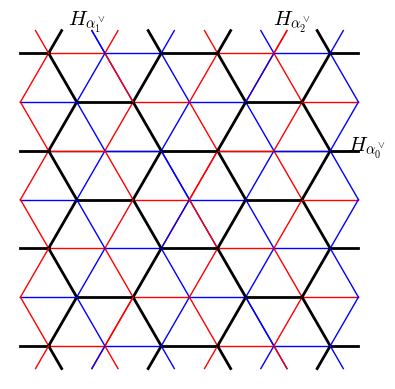

In [4]:
L.plot(fundamental_chamber=false, roots=false, fundamental_weights=false)

### Alcoves walks
- Alcove: an element `w` of the group
- Alcove path: an expression of `w` in terms of the generators

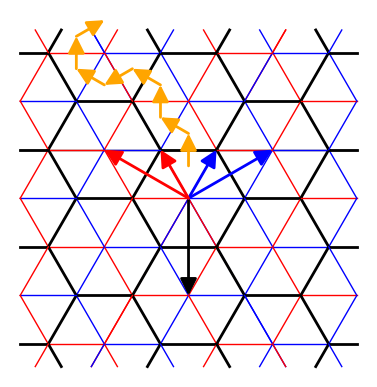

In [37]:
L = RootSystem(["A",2,1]).ambient_space()
w1 = [0,1,2,0,2,1,2,1]
L.plot(alcove_walk=w1, fundamental_chamber=False, labels=False)

### Why care?

- Root systems are the work horse in the study of Lie groups and algebras, Weyl and Coxeter groups, crystals, ...
- Many questions reduce to geometric or combinatorial considerations on the underlying root system

## Steps to reproduce the alcove art

### Prepare the base picture with SageMath

Draw an alcove path of type $\tilde A_2$:

In [5]:
L = RootSystem(["A",2,1]).ambient_space()
w1 = [0,1,2,0,2,1,2,1,0,2,0,2,1,2,1,2,0,2,0,1,2,1,0,1]
p = L.plot(alcove_walk=w1, bounding_box=[[-4.5,4.5],[-2.5,6]], fundamental_chamber=False, labels=False)

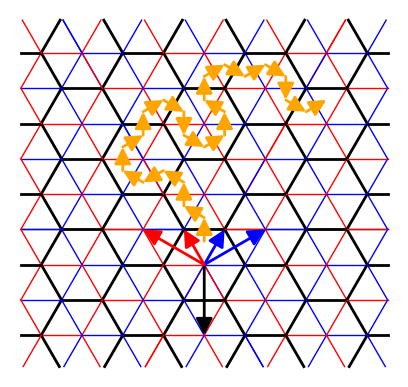

In [6]:
p

Customize the arrow sizes:

In [7]:
for x in p:
    if isinstance(x, sage.plot.arrow.Arrow):
       x._options['arrowsize'] = 3

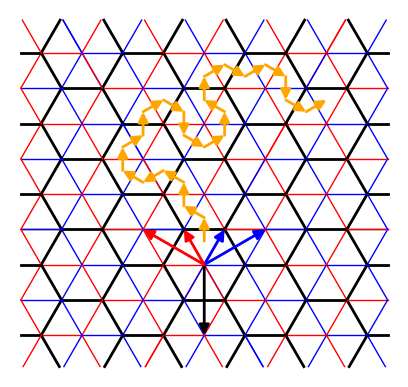

In [8]:
p

Export as SVG:

In [1]:
p.save("media/alcoves.svg") #, transparent=True, frame=False)

NameError: name 'p' is not defined

### How to make it fit on a piece of wood?
Input:
<table>
    <tr>
        <td><img src="media/alcoves.svg" width=300></td>
        <td><img src="media/alcoves-wood.jpg" width=300></td>
    </tr>
</table>

Output:
<table>
    <tr>
        <td><img src="media/alcoves-cut.svg" width=300></td>
        <td><img src="media/alcoves-result.jpg" width=300></td>
    </tr>
</table>

### General procedure
- Manually draw the mask of the area to be carved
- Currently: use inkscape and its arithmetic on surfaces

### Postprocess the base picture

Open `alcoves.svg` in inkscape:

In [ ]:
!inkscape alcoves.svg

The picture contains an outer frame made of a path with four nodes,
and a background made of a filled path with four nodes. We need to
remove them.

- Select all (Ctrl+A)
- Ungroup (Shift+Ctrl+G)
- Shift-click in the middle of the picture to keep only the outer
  frame selected
- Delete the outer frame (Delete)

- Select all (Ctrl+A)
- Ungroup (Shift+Ctrl+G)
- Ungroup (Shift+Ctrl+G)
- Unselect all by clicking well outside of the picture
- Select the white background by clicking close to the picture
- Delete (Delete)

Combine all the picture as a single surface, without contours:

- Select all, then ungroup
- Path -> Object to path (Shift+Ctrl+C)
- Path -> Combine (Ctrl-K)
- Path -> Stroke to Path (Ctrl+Alt+C)
- Fill-and-stroke tab (Shift+Ctrl+F)
- Stroke paint -> No paint
- Fill -> Flat color

Save as alcoves-flat.svg (Shift+Ctrl+S)
<img src="media/alcoves-flat.svg" width="40%">

### Prepare blueprint

- Scan the pieces of wood (e.g. on an A4 format sheet) and save in `alcoves-wood.jpg`
  <img src="media/alcoves-wood.jpg" width="40%">
- Create `alcoves-print.svg` with three layers: `BluePrint`, `Calibrate`, `Cut`
- Insert `alcoves-wood.jpg` in BluePrint
- Draw two little crosses to calibrate (top left, bottom left) in the layer Calibrate<br>
  Variant: import [calibrate.svg](calibrate.svg) as layer
- Copy paste the content of `alcoves-flat.svg` in the layer Cut

### Cut the base picture to the shape of the wood piece

#### Manually draw the mask of the area to be carved

- Display the layer `BluePrint`
- Create a new layer `Mask`
- Manually draw the mask in this layer
- Filled, No contour, 50% opacity
- Hide the layer `BluePrint`

#### Add the frontier of the mask to the alcoves

- Copy the mask (Ctrl+C)
- Hide layer `Mask`
- Paste in Place (Ctrl+Alt+V) in layer `Cut`
- No fill, stroke ~2 mm
- Stroke to path (Ctrl+Alt+C)
- Fill, no stroke
- Select alcoves and frontier (Ctrl+A)
- Union (Ctrl-+)

#### Intersect with the mask

- Show layer `Mask`
- Sélectionner the mask and the alcoves
- Intersect Ctrl-*
- Move to the above layer (Shift+PgUp) why?
- Suppress layer `Mask`

#### Extract the contour

- Opacity: 100%
- Strok to path
- No fill, Stroke: 0.1 px, red

#### Remove the outside path

- Path -> Break Apart (Shift+Ctrl+K)
- Select the outside path (zooming in if needed)
- Delete
- Select all (Ctrl+A)
- Union (Ctrl+*)

#### Check

- Show the layer `BluePrint`
  <img src="media/alcoves-print.png" width="40%">

## Laser print

- Print `alcoves-print.svg` file with its three layers on A4 paper (be careful to stick to 100% zoom!)

- Put the sheet on the laser cutter, with its lower left corner on the
  upper limit of the 12 mark.

- Hide the layers except for `Cut`

- Export `alcoves-print.svg` to eps (Save a copy -> eps -> ...)

- Launch a dry run (laser pointer on, bay open, no blower) and check that the laser draws the alignment crosses at the correct locations. The instructions below use the Linux cups-epilog driver for our Fablab's [Epilog Mini laser cutter 24''](https://nthiery.github.io/FabLab/machines/laser_cutter/):

In [ ]:
!sudo ifconfig eth0 129.175.5.208/16
!export DEVICE_URI="epilog://129.175.5.206/Legend/rp=100/rs=20/vp=100/vs=20/vf=500/rm=grey"
!../cups-epilog/epilog 123 nthiery alcoves < 2015-12-16-alcoves1.eps

- Put the wood on the sheet, with a bit of two-sided tape to prevent
  the air blower from moving the wood
- Launch a full run:

!../cups-epilog/epilog 123 nthiery alcoves < 2015-12-16-alcoves1.eps

## Projects
### More artwork based on root systems!
See the 2D and 3D pictures in the [Sage documentation](https://doc.sagemath.org/html/en/reference/combinat/sage/combinat/root_system/plot.html) for inspiration

### Automatize the production of this (and similar) artwork!
- Input: Sage's picture + mask
- Output: cut line for the laser printer as svg

Why automatize?
- Easier and quicker to reproduce and reuse
- Clearer description of the process
- Easier to show the intermediate steps to better explain the process

Suggestion:
- Python's 2D computational geometry library [shapely](https://shapely.readthedocs.io/en/latest/)
- See e.g. the following [course worksheets](https://gitlab.u-psud.fr/Info122/Info122/tree/master/Semaine1)